### minimize MSE closed-form solution called Normal equation

$$
\theta = \left( X^T X \right)^{-1} X^T y
$$

y = 4 + 3x1 + Gaussian noise

In [2]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best # smaller the dataset the harder

array([[4.21509616],
       [2.77011339]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

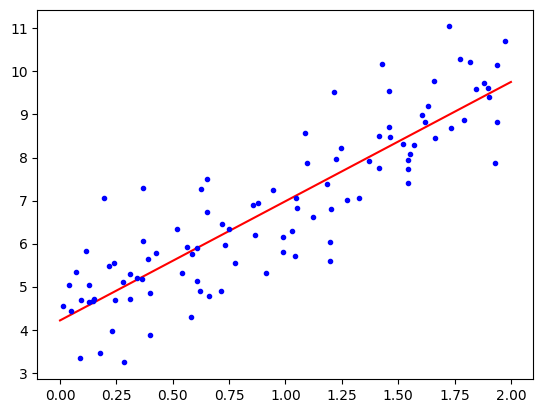

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-",label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # based on np.linalg.lstsq
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Moore–Penrose inverse
$$
\hat{\theta} = X^+ y
$$
pseudoinverse of X
$$
X^+ 
$$


In [10]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

pseudoinverse is calculated using singular value decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices

numpy.linalg.svd()
$$
U \Sigma V^\top
$$

$$
X^+ = V \Sigma^+ U^\top
$$

Σ+ is the pseudoinverse of the diagonal matrix Σ, which involves taking the reciprocal of all nonzero singular values and transposing the matrix.

This approach is more efficient than computing the Normal equation. Normal equation may not
work if the matrix X⊺X is not invertible (i.e., singular), if m < n or if some
features are redundant, but the pseudoinverse is always defined.

inverting a matrix is typically about O(n^2.4) to O(n^3), `LinearRegression` class is O(n^2)

when using gradient decent we have to ensure all features have a similar scale `StandardScaler`

computing gradient descent:

$$
\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^m \left( \theta^\top x_i - y_i \right) x_{i,j}
$$

to compute all gradients for each model parameter, we need gradient vector of the cost function

$$
\nabla_\theta MSE(\theta) =
\begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_1} \\
\frac{\partial J(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_n}
\end{bmatrix}
$$

$$
 = \frac{2}{m} X^\top (X\theta - y)
$$

training a linear regression model when there
are hundreds of thousands of features is much faster using gradient
descent than using the Normal equation or SVD decomposition.

$$
\theta_{\text{next}} = \theta - \eta \cdot \frac{2}{m} X^\top (X\theta - y)
$$

### Batch Gradient Descent

In [11]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

This is better as than batch because instead of using the whole training set it picks a random instance at every step and computes gradients only on that single instance

the cost function is more random so it may jump around and not settle at the min but its a good escape from local optima as there may be a global min.

so for this we make the learning rate high then go low called simulated annealing

we need a learning schedule so it has proper slowing/speeding up

In [13]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        y1 = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - y1) # SGD we leave out division
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [14]:
theta

array([[4.21076011],
       [2.74856079]])

### Stochastic Gradient Descent w/ Scikit-Learn

`SGDRegressor`

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000,
    tol=1e-5,
    penalty=None,
    eta0=0.01,
    n_iter_no_change=100,
    random_state=42
)
sgd_reg.fit(X, y.ravel()) # ravel because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Polynomial Regression

linear model to fit nonlinear data

generating nonlinear data
y = ax² + bx + c + plus some noise

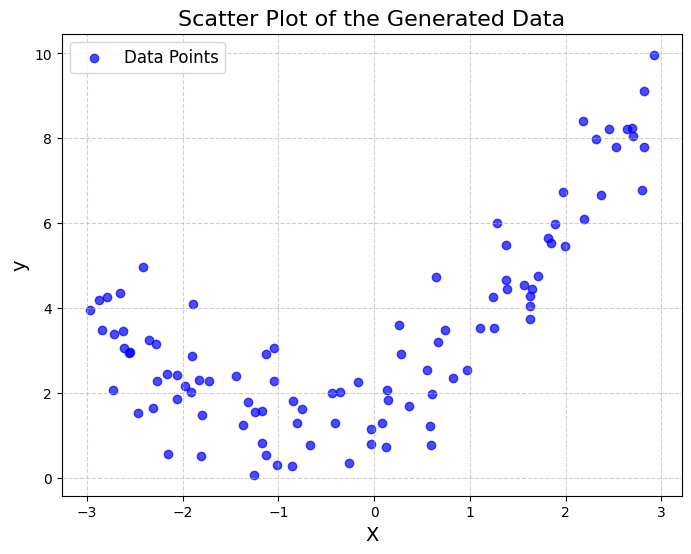

In [17]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label="Data Points")
plt.title("Scatter Plot of the Generated Data", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()

straight line will never fit the data properly `PolynomialFeatures` can help tranform training data by adding a second degree polynomial of each feature as a new feature

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [19]:
X_poly[0] # original X and X^2

array([-0.75275929,  0.56664654])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

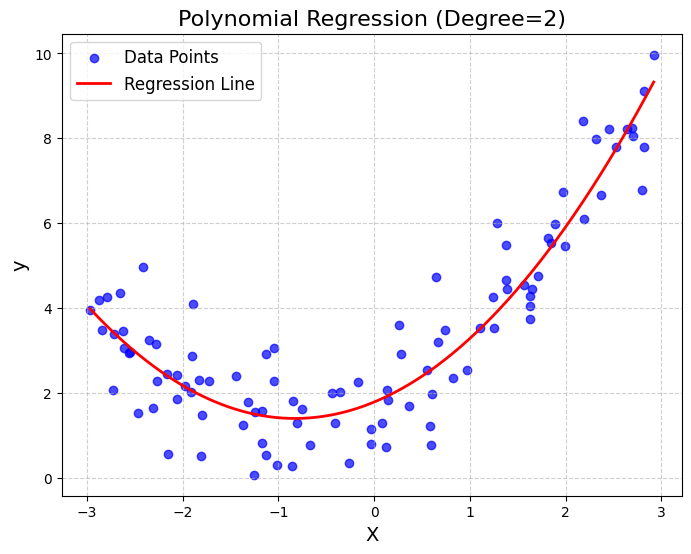

In [22]:
# Generate predictions for the regression line
X_new = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)  # Create 500 evenly spaced points for a smooth curve
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label="Data Points")
plt.plot(X_new, y_new, color='red', linewidth=2, label="Regression Line")
plt.title("Polynomial Regression (Degree=2)", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()

If you don't know the degree of the data we would evaluate the training and validation errors at regular intervals during training, and plot the results. (learning curves)

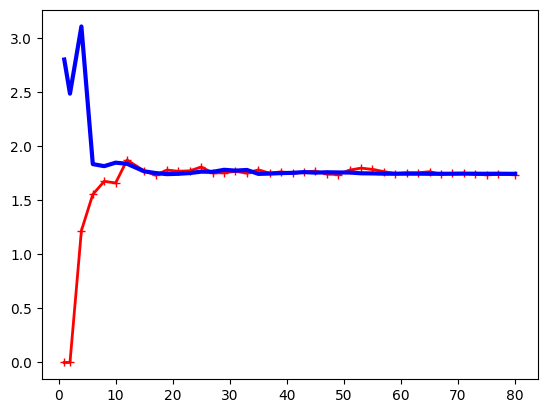

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),
    X,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

These learning curves are underfitting the data (both reached a plateau, they are close and fairly high)

if model is underfitting adding more training examples won't help, we need to use a better model or come up with better features

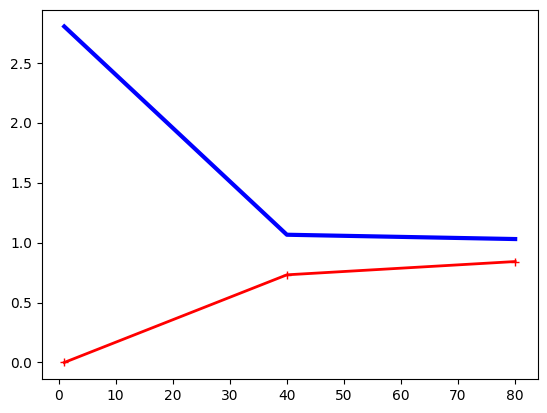

In [25]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)
# np.linspace(0.01, 1.0, 40) is not displaying graph properly theres a spike in the validation
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 3), cv=5,
    scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

Model does better on training data than validation, this is overfitting, if we use a much larger training set the curves would get closer

### Ridge regression (also called Tikhonov regularization) is a regularized version of linear regression

Better when all features contribute to the outcome

regularization term should only be added to
the cost function during training.

$$
J(\theta) = \text{MSE}(\theta) + \frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2
$$

if $\alpha$ = 0 its just linear regression, if $\alpha$ large all weights end up close to zero and the result is a flat line going through the data's mean

Once the model is trained, you want to use the
unregularized MSE (or the RMSE) to evaluate the model’s performance.

its important to use `StandardScaler` before regularization

closed-form ridge regression (A) is the identity matrix

$$
\theta = \left( \mathbf{X}^\top \mathbf{X} + \alpha \mathbf{A} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [27]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # ravel because fit expects 1D targets
sgd_reg.predict([[1.5]])

array([4.82830117])

Specifying
"l2" indicates that you want to add a regularization term to the MSE cost
function equal to alpha times the square of the l2 norm of the weight vector.

### Lasso Regression least absolute shrinkage and selection operator regression

uses the l1 norm of the weight vector instead of the square of the l2 norm 
that the l1 norm is multiplied by 2α, whereas the l2 norm was multiplied by α / m
in ridge regression. 

$$
J(\theta) = \text{MSE}(\theta) + 2\alpha \sum_{i=1}^{n} |\theta_i|
$$

eliminates the weights of the least important features (i.e., set them to zero)

to keep the gradient descent from bouncing around the optimum we need to gradually reduce learning rate during training

In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

### Elastic Net Regession sits between Lasso and Ridge

when r = 0 ENR is equivalent to Ridge, r = 1 Lasso

Elastic cost function:
$$
J(\theta) = \text{MSE}(\theta) + r (2\alpha \sum_{i=1}^{n} |\theta_i|) + (1 - r) (\frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2)
$$

# What linear regression should you use?

aviod linear because you want regularization, ridge is a good default and Elastic is perferred over lasso.

In [29]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

### Free lunch

early stopping regularization, stop training when validation error reaches min

with SGD and mini-batch it may be hard to know when we have reached min, stop when validation error has been above the min for some time

In [34]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
)

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train) # incremental learning
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mathias/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will

^ this does not actually stop training, but lets you revert to the best model after training.

### Logistic Regression

$$
p = h_\theta(x) = \sigma(\theta^\top x)
$$

sigmoid function classify 1 or 0

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

logit(p) = log(p / (1 – p)), is the inverse of the logistic function it's the untransformed value that the sigmoid squashes into a probability. Used as a linear function to train

cost function called log loss

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]
$$

The log loss was not just pulled out of a hat. It can be shown mathematically (using Bayesian inference)

There is no known closed-form to compute θ that min this cost function (no equivalent of the Normal equation)

but the cost function is convex, GD or any other optimization algorithm is guarenteed to find the global minimum

Logistic cost function partial derivatives:
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( \sigma(\theta^\top x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

for each instance it computes the
prediction error and multiplies it by the jth feature value, and then it computes the
average over all training instances. Then using gradient vector containing
all the partial derivatives, we can use it in the BGD algorithm.

In [35]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [36]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [37]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

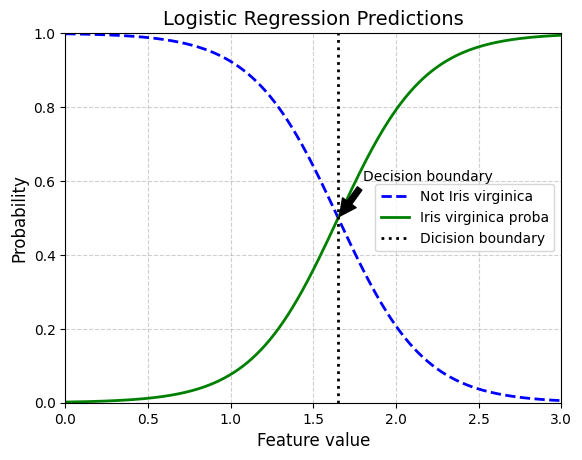

In [61]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Dicision boundary")

plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Feature value", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title("Logistic Regression Predictions", fontsize=14)
plt.legend(fontsize=10)
plt.axis([0, 3, 0, 1])

# Add arrows
plt.annotate(
    "Decision boundary",
    xy=(decision_boundary, 0.5),
    xytext=(1.8, 0.6),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10
)

plt.show()